<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/new/project_ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd 
import numpy as np

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
DrDoS_DNS_data_1_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_DNS.csv',nrows=5000)
DrDoS_LDAP_data_2_0_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_LDAP.csv',nrows=5000)
DrDoS_MSSQL_data_1_3_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_MSSQL.csv',nrows=5000)
DrDoS_NetBIOS_data_1_3_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_NetBIOS.csv',nrows=5000)
DrDoS_NTP_data_data_5_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_NTP.csv',nrows=5000)
DrDoS_SNMP_data_1_3_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_SNMP.csv',nrows=5000)
DrDoS_SSDP_data_2_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_SSDP.csv',nrows=5000)
DrDoS_UDP_data_2_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_UDP.csv',nrows=5000)
Syn_data_4_per = pd.read_csv('/content/drive/MyDrive/01-12/Syn.csv',nrows=5000)
UDPLag_data_2_0_per = pd.read_csv('/content/drive/MyDrive/01-12/UDPLag.csv',nrows=5000)

In [4]:
data = pd.concat([DrDoS_DNS_data_1_per, DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_1_3_per, DrDoS_NetBIOS_data_1_3_per, DrDoS_NTP_data_data_5_per, DrDoS_SNMP_data_1_3_per, DrDoS_SSDP_data_2_per, DrDoS_UDP_data_2_per, Syn_data_4_per, UDPLag_data_2_0_per], ignore_index = True)

In [5]:
data.shape

(50000, 88)

In [6]:
data[' Label'].value_counts()

DrDoS_MSSQL      5000
DrDoS_UDP        5000
UDP-lag          5000
DrDoS_LDAP       4999
Syn              4998
DrDoS_SNMP       4997
DrDoS_NetBIOS    4991
DrDoS_SSDP       4973
BENIGN           4851
DrDoS_DNS        4413
DrDoS_NTP         778
Name:  Label, dtype: int64

In [7]:
data.columns 

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [8]:
data_real = data.replace(np.inf, np.nan)

In [9]:
data_real.isnull().sum().sum()

1666

In [10]:
data_df = data_real.dropna(axis=0)

In [11]:
data_df.isnull().sum().sum()

0

In [12]:
data_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,310726,172.16.0.5-192.168.50.1-52292-39139-17,172.16.0.5,52292,192.168.50.1,39139,17,2018-12-01 13:04:46.493768,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
49996,112527,172.16.0.5-192.168.50.1-35780-28095-17,172.16.0.5,35780,192.168.50.1,28095,17,2018-12-01 13:04:46.493959,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
49997,50719,172.16.0.5-192.168.50.1-43479-64437-17,172.16.0.5,43479,192.168.50.1,64437,17,2018-12-01 13:04:46.494010,106451,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
49998,351644,172.16.0.5-192.168.50.1-56855-19645-17,172.16.0.5,56855,192.168.50.1,19645,17,2018-12-01 13:04:46.494012,215812,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [13]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [14]:
data_X.columns 

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [15]:
data_X.shape 

(49167, 86)

In [16]:
data_y = data_df[' Label']

In [17]:
data_y.shape 

(49167,)

In [18]:
data_df.isnull().sum().sum()

0

In [19]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'UDP-lag'], dtype=object)

In [20]:
data_X 

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,310726,172.16.0.5-192.168.50.1-52292-39139-17,172.16.0.5,52292,192.168.50.1,39139,17,2018-12-01 13:04:46.493768,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49996,112527,172.16.0.5-192.168.50.1-35780-28095-17,172.16.0.5,35780,192.168.50.1,28095,17,2018-12-01 13:04:46.493959,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49997,50719,172.16.0.5-192.168.50.1-43479-64437-17,172.16.0.5,43479,192.168.50.1,64437,17,2018-12-01 13:04:46.494010,106451,4,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49998,351644,172.16.0.5-192.168.50.1-56855-19645-17,172.16.0.5,56855,192.168.50.1,19645,17,2018-12-01 13:04:46.494012,215812,6,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
from sklearn.preprocessing import LabelEncoder 

In [22]:
le = LabelEncoder()

In [23]:
data_y_trans = le.fit_transform(data_y)
le_fid = LabelEncoder()


In [24]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [25]:
le_SIP = LabelEncoder()

In [26]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [27]:
le_DIP = LabelEncoder()


In [28]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [29]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [30]:
data_X

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,425,26494,16,634,84,60495,17,4985,28415,97,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,430,19087,72,634,22,60495,17,4986,2,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1654,25668,16,634,84,46391,17,4987,48549,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2927,23796,16,634,84,11894,17,4988,48337,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,694,24670,16,634,84,27878,17,4989,32026,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,310726,13193,16,52292,84,39139,17,44580,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49996,112527,4170,16,35780,84,28095,17,44581,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49997,50719,9442,16,43479,84,64437,17,44582,106451,4,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49998,351644,16684,16,56855,84,19645,17,44583,215812,6,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
df2 = pd.DataFrame(data_X)  

In [32]:
df2.to_csv(r'my_data.csv', index=False)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
ml = DecisionTreeClassifier(random_state=0,max_depth=2)

In [63]:
ml.fit(X_train_std,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [64]:
res=ml.predict(X_test_std)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_1=accuracy_score(y_test,res)
print("Decision tree :",accuracy_1*100)

Decision tree : 29.184462070368113


FEATURE SELECTION

In [45]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

In [105]:
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, 
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [106]:
model.feature_importances_

array([5.02646174e-02, 5.82616301e-02, 1.59789822e-02, 6.66670701e-02,
       5.46797511e-03, 9.75087719e-03, 1.70424620e-02, 2.32791900e-01,
       3.47666699e-03, 5.04367483e-03, 2.70791092e-04, 2.13186165e-02,
       5.63925711e-04, 2.80217740e-02, 3.80497934e-02, 2.86211744e-02,
       3.65747754e-03, 9.50808392e-04, 1.23556504e-04, 8.92234643e-04,
       4.95626444e-04, 2.41245326e-02, 1.53291488e-02, 3.27540873e-03,
       2.16143547e-03, 4.23839832e-03, 3.06630626e-03, 6.67856341e-03,
       3.42059037e-03, 1.74897176e-03, 3.82038425e-03, 2.46854108e-03,
       4.46053465e-04, 1.55918729e-04, 1.07371664e-04, 1.31421723e-04,
       1.82242082e-04, 4.44320336e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.02285203e-03, 5.45800012e-04, 1.78019939e-02,
       7.88298832e-04, 4.40929160e-02, 1.93297607e-02, 3.48568584e-02,
       2.35324512e-03, 2.33987992e-03, 0.00000000e+00, 2.70831966e-05,
       4.07946645e-04, 0.00000000e+00, 2.91691735e-02, 6.03142437e-03,
      

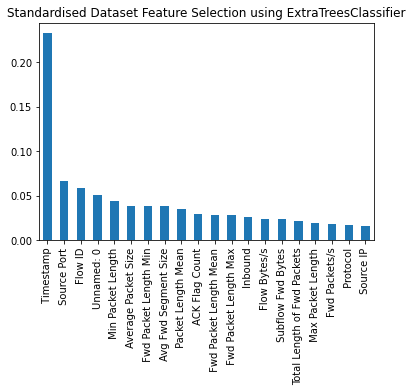

In [107]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [108]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [109]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,4985,634,440.0,440.0,26494,440.000000,440.0,444.536082,0,440.0,440.0,1.502024e+06,440.0,17,3.413690e+03,3.413690e+03,42680.0,42680,60495,96
1,4986,634,440.0,440.0,19087,440.000000,440.0,660.000000,0,440.0,440.0,4.400000e+08,440.0,17,1.000000e+06,1.000000e+06,880.0,880,60495,1
2,4987,634,440.0,440.0,25668,440.000000,440.0,442.200000,0,440.0,440.0,1.812602e+06,440.0,17,4.119549e+03,4.119549e+03,88000.0,88000,46391,199
3,4988,634,440.0,440.0,23796,440.000000,440.0,442.200000,0,440.0,440.0,1.820552e+06,440.0,17,4.137617e+03,4.137617e+03,88000.0,88000,11894,199
4,4989,634,440.0,440.0,24670,440.000000,440.0,442.200000,0,440.0,440.0,2.747767e+06,440.0,17,6.244926e+03,6.244926e+03,88000.0,88000,27878,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44580,52292,383.0,383.0,13193,383.000000,383.0,574.500000,0,383.0,383.0,7.660000e+08,383.0,17,2.000000e+06,2.000000e+06,766.0,766,39139,1
49996,44581,35780,383.0,383.0,4170,383.000000,383.0,574.500000,0,383.0,383.0,7.660000e+08,383.0,17,2.000000e+06,2.000000e+06,766.0,766,28095,1
49997,44582,43479,330.0,330.0,9442,345.600000,369.0,432.000000,0,349.5,349.5,1.313280e+04,369.0,17,3.757597e+01,3.757597e+01,1398.0,1398,64437,3
49998,44583,56855,321.0,321.0,16684,344.142857,393.0,401.500000,0,348.0,348.0,9.675088e+03,393.0,17,2.780198e+01,2.780198e+01,2088.0,2088,19645,5


In [110]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [111]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, random_state=0)
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier(random_state=0)

In [129]:
rf_y_pred = rf.predict(X_test_std_20)

In [130]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [131]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      1412
    DrDoS_DNS       0.99      0.98      0.99      1339
   DrDoS_LDAP       0.99      1.00      0.99      1507
  DrDoS_MSSQL       1.00      1.00      1.00      1483
    DrDoS_NTP       0.99      1.00      0.99       242
DrDoS_NetBIOS       1.00      1.00      1.00      1424
   DrDoS_SNMP       1.00      1.00      1.00      1505
   DrDoS_SSDP       1.00      1.00      1.00      1554
    DrDoS_UDP       1.00      0.99      0.99      1414
          Syn       1.00      1.00      1.00      1335
      UDP-lag       0.99      1.00      1.00      1536

     accuracy                           1.00     14751
    macro avg       1.00      1.00      1.00     14751
 weighted avg       1.00      1.00      1.00     14751



In [132]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.66103992949631


XGBoost

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
max_depth=3, random_state=0)
gradient_boost.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier(random_state=0)

In [121]:
res=gradient_boost.predict(X_test_std_20)

In [122]:
acc_score = accuracy_score(y_test_20, res)
print("Accuracy Score for GradientBoosting: \n", acc_score*100)

Accuracy Score for GradientBoosting: 
 99.28818385194225
